# Praca domowa 8
### Przemysław Olender

### Orginalny wykres
Orgianlny wykres pochodzi z facebookowego fanpage'a International Champions Cup, można go znaleźć pod adresem: https://www.facebook.com/Internationalchampionscup/photos/4311739122186549. Wizualizacja przedstawia zmiany wartości rynkowej bramkarza Realu Madyrt - Thibaut Courtois. Największym błędem popełnionym na wykresie jest dobór skali na osiach. Na osi Y, nie jest ona podzielona na równe przedziały, przez co prezentowana tendencja nie pokrywa się z rzeczywistymi zmianami wartości, przedziały między 5 a 10 milinów oraz między 10 a 50 są równe. Również przedziały na osi X są źle dobrane, wydaje się, że między 2010 a 2015 upłyneło tyle samo czasu co pomiędzy 2015 i 2016. Same podpisy osi X wydają się również lekko niezgrane z wartościami na osi Y.

![](orginal.jpg)

### Poprawiony wykres

#### Stowrzenie ramki danych
Żeby dokładneij przedstawić wartość użyłem danych z https://www.transfermarkt.pl/thibaut-courtois/marktwertverlauf/spieler/108390.

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

In [161]:
club = []
for i in range (7): club.append('KRC Genk')
for i in range(8):  club.append('Atletico Madrid')
for i in range(12): club.append('Chelsea FC')
for i in range(8): club.append('Real Madrid')
    
date = ['2009-05-27', '2010-07-26', '2010-10-06', '2010-12-28',
        '2011-05-24', '2011-06-28', '2011-07-29', '2011-07-29',
        '2012-02-03', '2012-08-01', '2013-01-10', '2013-06-12',
        '2013-06-12', '2014-01-23', '2014-08-12', '2014-08-12', 
        '2015-02-12', '2015-07-01', '2016-02-09', '2016-06-01', 
        '2016-08-01', '2017-02-20', '2017-06-28', '2018-01-02', 
        '2018-03-23', '2018-05-28', '2018-07-16', '2018-07-16', 
        '2018-12-21', '2019-06-11', '2019-12-20', '2020-03-05', 
        '2020-04-08', '2020-07-23', '2020-10-08']

date = pd.to_datetime(date)

value = np.array([50000, 150000, 1000000, 2000000, 3000000, 4000000,
         6000000, 6000000, 9000000, 15000000, 15000000, 18000000, 
         25000000, 25000000, 25000000, 25000000, 30000000, 35000000,
         35000000, 35000000, 35000000, 40000000, 40000000, 50000000,
         60000000, 60000000, 65000000, 65000000, 65000000, 55000000,
         55000000, 60000000, 48000000, 60000000, 75000000])

value = (1.21219 * value).astype(int) #zmaian euro na dolary

data = {'club': club,
        'date': date,
        'value': value
       }

data = pd.DataFrame(data)
data

,club,date,value
0,KRC Genk,2009-05-27,60609
1,KRC Genk,2010-07-26,181828
2,KRC Genk,2010-10-06,1212190
3,KRC Genk,2010-12-28,2424380
4,KRC Genk,2011-05-24,3636570
...,...,...,...
30,Real Madrid,2019-12-20,66670450
31,Real Madrid,2020-03-05,72731400
32,Real Madrid,2020-04-08,58185120
33,Real Madrid,2020-07-23,72731400


In [162]:
#stowrzenie palety kolorów
color = {'KRC Genk' : 'navy',
         'Atletico Madrid' : 'red',
         'Chelsea FC' : 'blue',
         'Real Madrid' : 'gold'}

#### Rysowanie wykresu

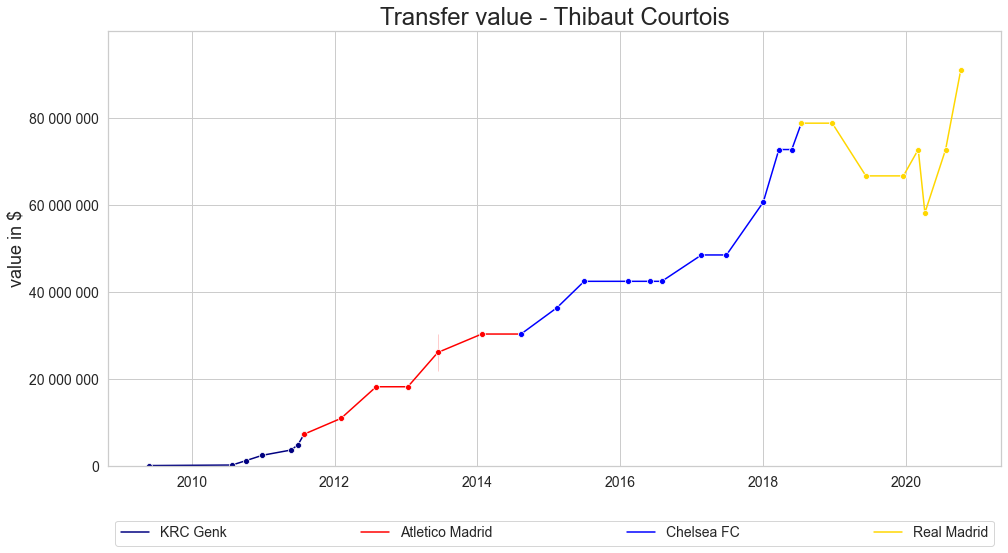

In [166]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
ax = sns.lineplot(data = data, x="date", y="value", hue="club", marker = 'o', palette = color, )
plt.ylim(0, 100000000)

#zmiana podpisów osi Y na bardziej czytelne
y_axis = np.array([2 * i * 10**7 for i in range(5)])
s = ['{:,.0f}'.format(i).replace(',', ' ') for i in y_axis]
ax.set_yticklabels(s, fontsize = 14)

ax.tick_params(axis='x', which='major', labelsize=14)

plt.title('Transfer value - Thibaut Courtois', fontsize = 24)
plt.ylabel('value in $', fontsize = 18)
plt.xlabel('')
plt.legend(bbox_to_anchor=(0, -.2, 1, -.2), ncol=4, mode = "expand", loc='lower left', fontsize=14)


Na poprawionym wykresie na obu osiach są stałe przedziały, przez co prezentowana tendencja jest prawdziwa, łatwiej odczytać dane, ponieważ etykiety są poprawinie ułożone. Można równiez łatwo odczytać w którym klubie grał zawodnik w danym czasie, same kolory odpowiadają barwom zespołów. Zbyt duża ilość grafiki nie odwraca uwagi od wykresu.